In [1]:
import numpy as np
import math

# sigmoidal function
def activation(x):
    return 1 / (1 + math.exp(-x))

inputs = np.array([1, 2, 3, 4])
weights = np.array([0.2, 0.324, 0.1, .001])
bias = 1.5

a = activation(np.dot(inputs.T, weights) + bias)

a

0.9341341524806636

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model, datasets, metrics
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

In [14]:
images = np.genfromtxt('mnist_train.csv', delimiter=',')
images.shape

(6000, 785)

In [15]:
images_X, images_y = images[:,1:], images[:,0]

# values are much larger than 0-1 but scikit-learn RBM version assumes 0-1 scaling
np.min(images_X), np.max(images_X)

(0.0, 255.0)

5.0

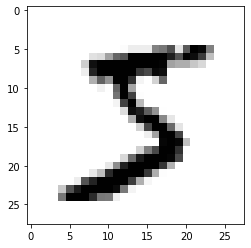

In [16]:
plt.imshow(images_X[0].reshape(28, 28), cmap=plt.cm.gray_r)

images_y[0]

In [17]:
# scale images_X to be beteen 0 and 1
images_X = images_X / 255.

# make pixels binary (either white or black)
images_X = (images_X > 0.5).astype(float)

np.min(images_X), np.max(images_X)

(0.0, 1.0)

5.0

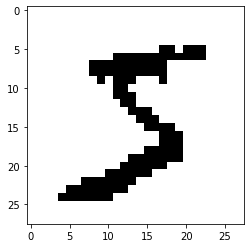

In [18]:
plt.imshow(images_X[0].reshape(28, 28), cmap=plt.cm.gray_r)

images_y[0]

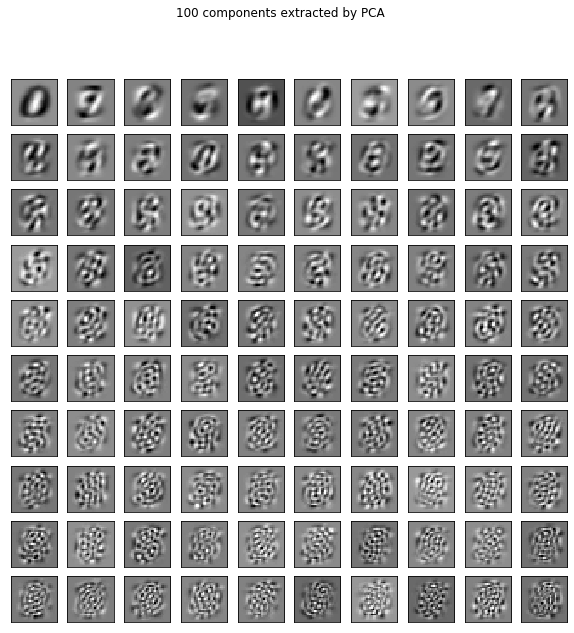

In [19]:
# import Principal Components Analysis module
from sklearn.decomposition import PCA

# extract 100 "eigen-digits"
pca = PCA(n_components=100)
pca.fit(images_X)

# graph the 100 components
plt.figure(figsize=(10, 10))
for i, comp in enumerate(pca.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by PCA')

plt.show()

In [20]:
pca.explained_variance_ratio_[:30].sum()

0.6374141399357542

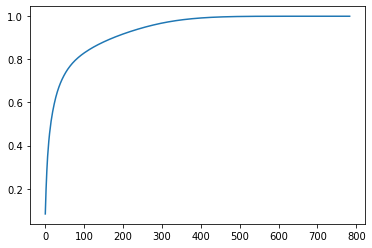

In [21]:
full_pca = PCA(n_components=784)
full_pca.fit(images_X)

plt.plot(np.cumsum(full_pca.explained_variance_ratio_))

In [22]:
# Use pca to transform the first image
pca.transform(images_X[:1])

array([[ 0.61090568,  1.36377972,  0.42170384, -2.19662829, -0.45181076,
        -1.32049499,  0.79434674,  0.30551117,  1.22978974, -0.7209673 ,
         0.08168339, -1.91375643, -2.54647373, -1.62440679,  0.67107145,
         0.1563566 ,  0.91831558, -0.18982437,  1.30140758,  1.57928671,
         0.9905427 ,  0.11280097,  1.07342107,  0.70139229, -0.35905429,
         0.16656112,  0.99308919, -0.73113379,  0.8696472 , -0.18636832,
        -0.72503278,  0.11262073,  0.16117266,  0.07331158,  0.11731471,
        -0.72983437, -0.2965799 ,  0.17303952,  0.29895068,  2.32448734,
        -0.20362047, -0.85407518,  0.67660044,  0.3479519 ,  0.34089375,
        -0.42147508, -0.20665435,  0.3932703 , -0.31692782,  0.38499973,
         0.06153345,  0.07791799,  0.62888125,  0.79420447, -0.41382821,
         0.03777706, -0.18031172,  0.16394444, -0.51442222, -0.36673658,
        -0.40994848, -0.47807315,  0.48378358,  0.29852338,  0.2135774 ,
         0.78757919, -0.7147907 ,  0.41096491, -0.2

In [23]:
# reminder that transformation is a matrix multiplication away
np.dot(images_X[:1]-images_X.mean(axis=0), pca.components_.T)

array([[ 0.61090568,  1.36377972,  0.42170384, -2.19662829, -0.45181076,
        -1.32049499,  0.79434674,  0.30551117,  1.22978974, -0.7209673 ,
         0.08168339, -1.91375643, -2.54647373, -1.62440679,  0.67107145,
         0.1563566 ,  0.91831558, -0.18982437,  1.30140758,  1.57928671,
         0.9905427 ,  0.11280097,  1.07342107,  0.70139229, -0.35905429,
         0.16656112,  0.99308919, -0.73113379,  0.8696472 , -0.18636832,
        -0.72503278,  0.11262073,  0.16117266,  0.07331158,  0.11731471,
        -0.72983437, -0.2965799 ,  0.17303952,  0.29895068,  2.32448734,
        -0.20362047, -0.85407518,  0.67660044,  0.3479519 ,  0.34089375,
        -0.42147508, -0.20665435,  0.3932703 , -0.31692782,  0.38499973,
         0.06153345,  0.07791799,  0.62888125,  0.79420447, -0.41382821,
         0.03777706, -0.18031172,  0.16394444, -0.51442222, -0.36673658,
        -0.40994848, -0.47807315,  0.48378358,  0.29852338,  0.2135774 ,
         0.78757919, -0.7147907 ,  0.41096491, -0.2

In [24]:
# instantiate our BernoulliRBM
# we set a random_state to initialize our weights and biases to the same starting point
# verbose is set to True to see the fitting period
# n_iter is the number of back and forth passes
# n_components (like PCA and LDA) represent the number of features to create
# n_components can be any integer, less than , equal to, or greater than the original number of features
rbm = BernoulliRBM(random_state=0, verbose=True, n_iter=20, n_components=100)

In [25]:
rbm.fit(images_X)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -138.59, time = 0.48s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -120.25, time = 0.55s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -116.46, time = 0.53s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -118.42, time = 0.53s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -112.37, time = 0.51s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -109.97, time = 0.50s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -116.41, time = 0.50s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -109.70, time = 0.51s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -112.17, time = 0.51s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -105.04, time = 0.49s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -104.57, time = 0.49s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -104.95, time = 0.52s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -109.09, time = 0.50s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -110.33, time = 0.49s
[BernoulliRBM] 

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=100, n_iter=20,
             random_state=0, verbose=True)

In [26]:
# RBM also has components_ attribute
len(rbm.components_)

100

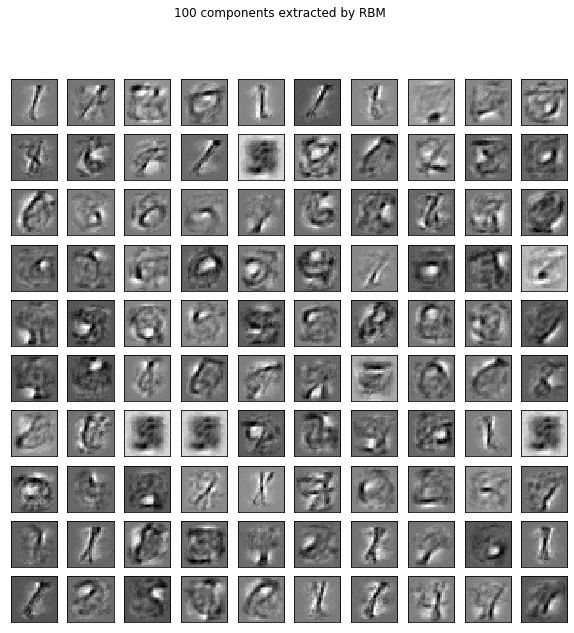

In [27]:
# plot the RBM components (representations of the new feature sets)
plt.figure(figsize=(10, 10))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM')

plt.show()

In [28]:
np.unique(rbm.components_.mean(axis=1)).shape

(100,)

In [29]:
image_new_features = rbm.transform(images_X[:1]).reshape(100,)

image_new_features

array([1.57210581e-16, 3.12674619e-15, 6.56801258e-09, 1.17553521e-02,
       3.55578293e-18, 7.02915447e-14, 4.21962691e-10, 1.54217465e-10,
       1.76321641e-21, 5.85395668e-07, 3.17026495e-05, 2.51711525e-03,
       2.56169958e-22, 5.78541642e-14, 1.00000000e+00, 4.87877940e-03,
       1.05786939e-13, 1.39142955e-06, 4.87960846e-01, 2.76978069e-09,
       3.39250487e-15, 9.97238624e-01, 3.68202289e-11, 2.35118749e-06,
       7.70435192e-14, 1.03613438e-17, 1.56407217e-04, 6.73556712e-05,
       9.85353155e-01, 1.00000000e+00, 2.81115665e-05, 2.15653464e-05,
       8.79972795e-17, 3.25746311e-10, 9.99999997e-01, 1.13384170e-17,
       2.28772018e-14, 1.69237377e-14, 2.86813102e-05, 7.68772482e-11,
       8.11884149e-17, 9.99997736e-01, 1.31865941e-13, 1.03354360e-11,
       2.56073911e-07, 9.99413987e-01, 1.02664878e-11, 2.02808258e-16,
       3.11422462e-07, 1.00000000e+00, 5.48466520e-26, 1.07004015e-20,
       5.45991767e-16, 5.83877447e-13, 4.92741842e-18, 2.64365375e-12,
      

In [30]:
np.dot(images_X[:1]-images_X.mean(axis=0), rbm.components_.T)

array([[ -2.73812671, -10.71022413,  -9.32197824,  13.17500053,
         -8.90236709,  -0.65738837,   0.96176768, -29.92032627,
        -28.2409098 ,  -2.43939535,   7.76034755,  19.04085926,
        -24.38256336,  -7.56701072,   7.29931339,   7.52074384,
          0.49223382,  -0.35822841,  13.98858891,  -0.16378608,
        -12.99876115,  24.67771066, -15.98991919,   5.55894757,
          0.7503061 ,  -4.97790527,   2.52460981,  13.29094074,
         21.03538981,  17.12198593,   2.35030272,   5.26868007,
        -25.80548456,   4.87102279,  35.18765648, -17.33167717,
        -12.75020031,  14.55022915,  -2.15243992, -44.35997282,
        -20.18627545,  27.05490996,  -9.59166933, -15.37317282,
         -5.43789982,  18.38155093,  -6.36146665, -18.33808988,
         -9.50893763,  33.20146018, -27.73274878, -20.79994691,
         -7.58492586,  -9.11001031, -17.17581532,   1.64841259,
         24.63633079,  -5.00170621,   9.06808124,   1.83606506,
         -1.5544963 ,   4.2489287 ,   7.

In [31]:
top_features = image_new_features.argsort()[-20:][::-1]

print(top_features)
image_new_features[top_features]

[62 69 14 56 63 29 49 34 82 92 41 83 58 45 21 28 18  3 15 11]


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99999861, 0.99999851,
       0.99999774, 0.99998969, 0.99994953, 0.99941399, 0.99723862,
       0.98535315, 0.48796085, 0.01175535, 0.00487878, 0.00251712])

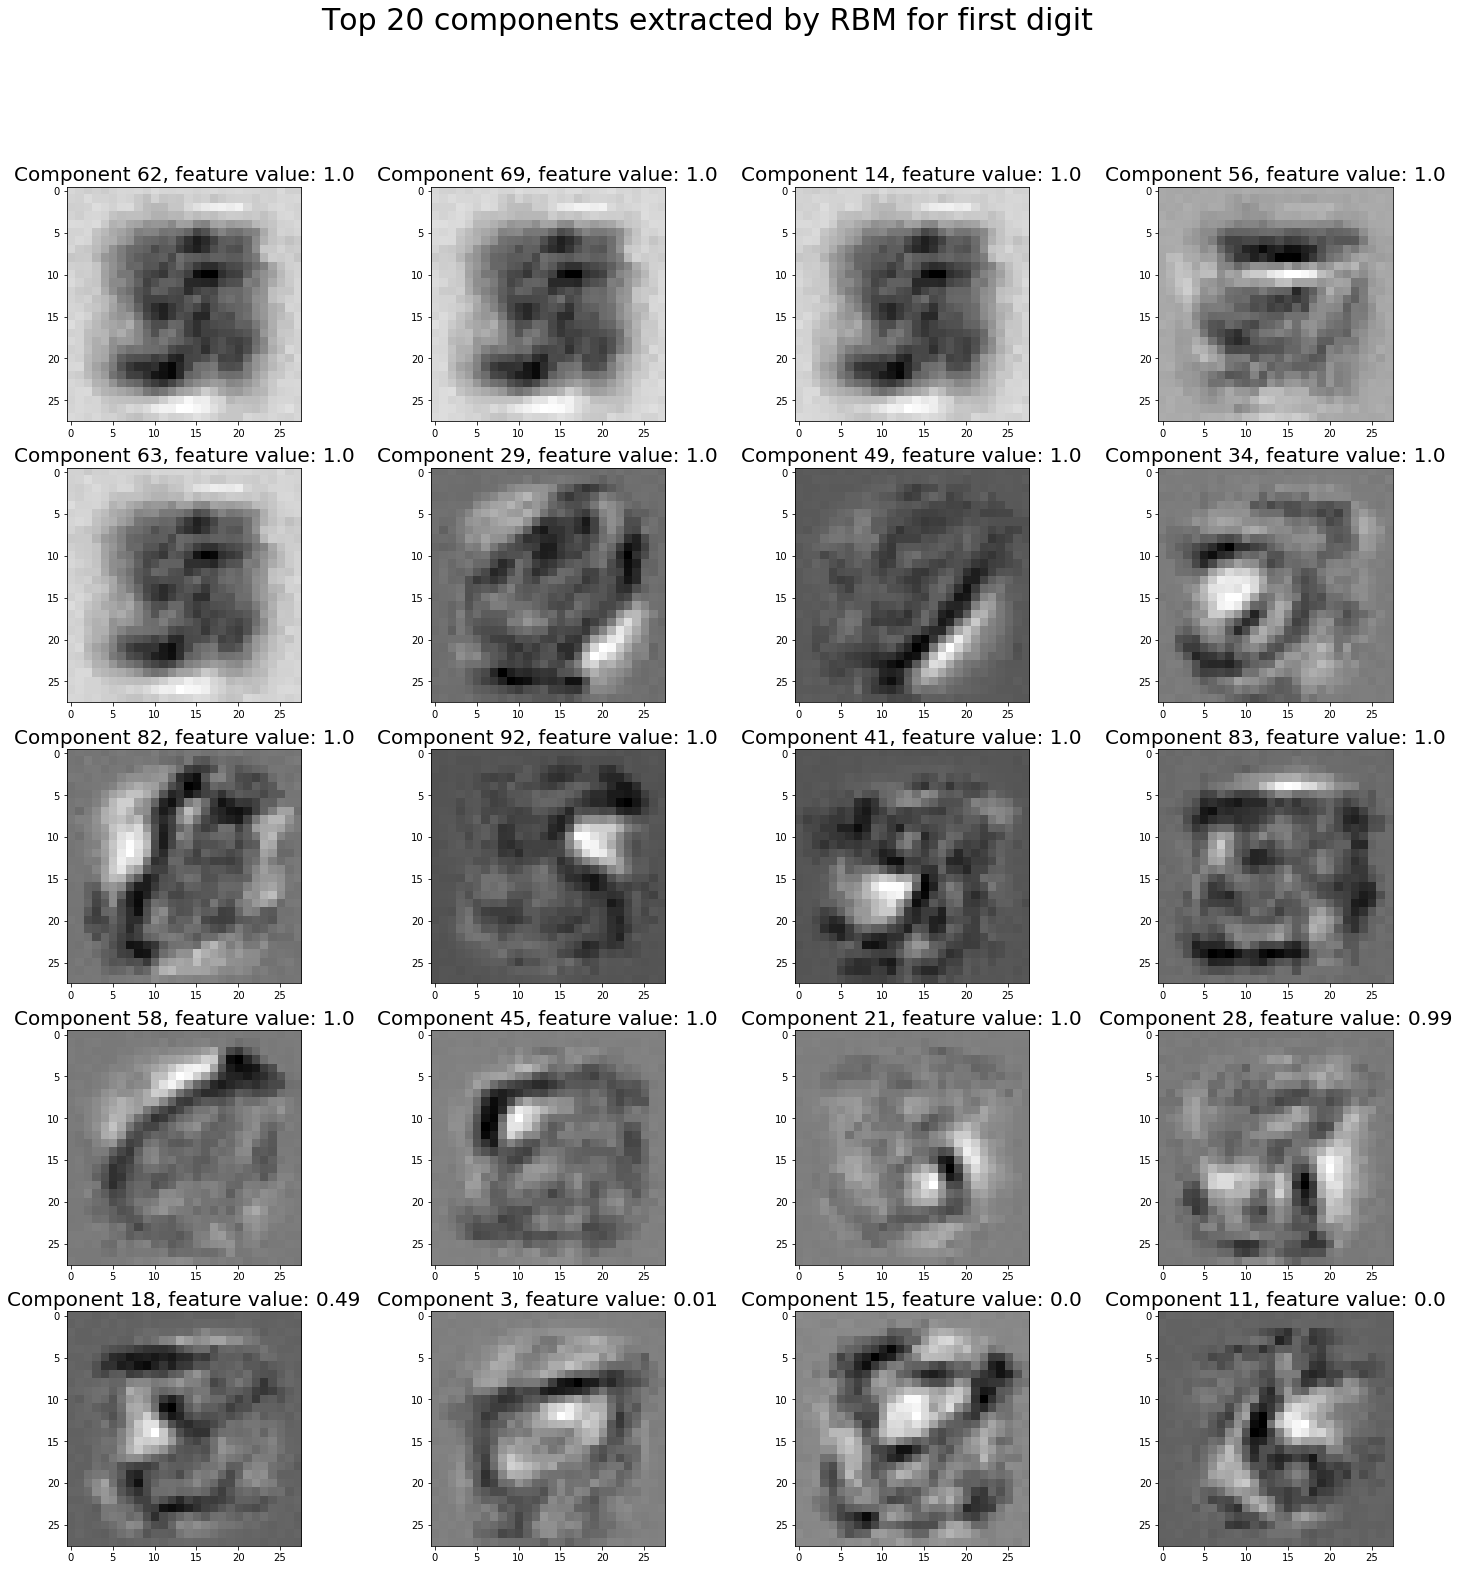

In [32]:
plt.figure(figsize=(25, 25))
for i, comp in enumerate(top_features):
    plt.subplot(5, 4, i + 1)
    plt.imshow(rbm.components_[comp].reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.title("Component {}, feature value: {}".format(comp, round(image_new_features[comp], 2)), fontsize=20)
plt.suptitle('Top 20 components extracted by RBM for first digit', fontsize=30)

plt.show()

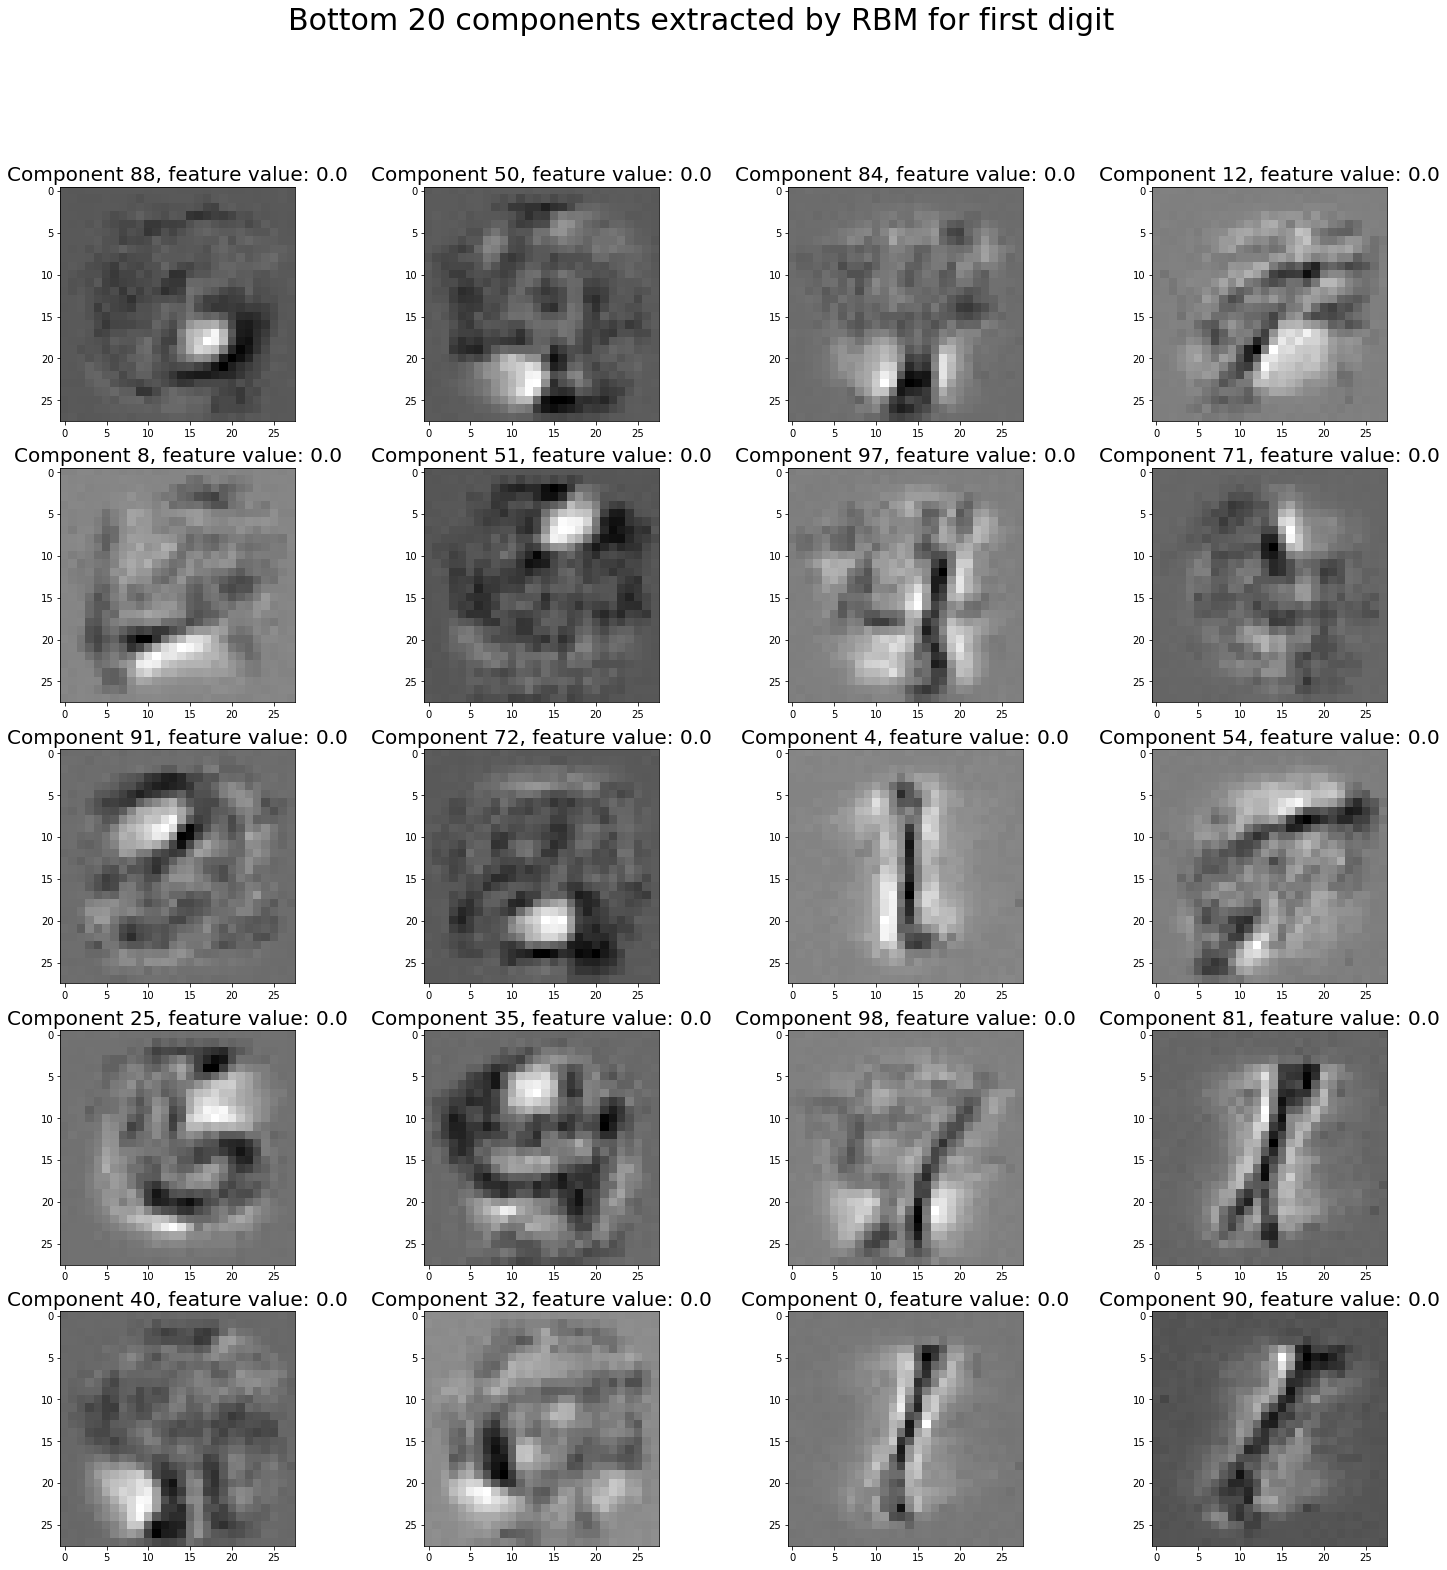

In [33]:
bottom_features = image_new_features.argsort()[:20]

plt.figure(figsize=(25, 25))
for i, comp in enumerate(bottom_features):
    plt.subplot(5, 4, i + 1)
    plt.imshow(rbm.components_[comp].reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.title("Component {}, feature value: {}".format(comp, round(image_new_features[comp], 2)), fontsize=20)
plt.suptitle('Bottom 20 components extracted by RBM for first digit', fontsize=30)

plt.show()

In [34]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# create our logistic regression
lr = LogisticRegression()
params = {'C':[1e-2, 1e-1, 1e0, 1e1, 1e2]}

# instantiate a gridsearh class
grid = GridSearchCV(lr, params)

# fit to our data
grid.fit(images_X, images_y)

# check the best params
grid.best_params_, grid.best_score_

/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-

({'C': 0.1}, 0.8908333333333334)

In [35]:
lr = LogisticRegression()
pca = PCA()

params = {'clf__C':[1e-1, 1e0, 1e1],
         'pca__n_components': [10, 100, 200]}

# create our pipeline
pipeline = Pipeline([('pca', pca), ('clf', lr)])

# instantiate a gridsearh class
grid = GridSearchCV(pipeline, params)

# fit to our data
grid.fit(images_X, images_y)

# check the best params
grid.best_params_, grid.best_score_

/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-

/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-packages/skl

({'clf__C': 1.0, 'pca__n_components': 100}, 0.8878333333333334)

In [36]:
rbm = BernoulliRBM(random_state=0)

params = {'clf__C':[1e-1, 1e0, 1e1],
          'rbm__n_components': [100, 200]
         }

# create our pipeline
pipeline = Pipeline([('rbm', rbm), ('clf', lr)])

# instantiate a gridsearh class
grid = GridSearchCV(pipeline, params)

# fit to our data
grid.fit(images_X, images_y)

# check the best params
grid.best_params_, grid.best_score_

/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-

/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/super/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


({'clf__C': 1.0, 'rbm__n_components': 200}, 0.9178333333333333)